In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
air_humidity = pd.read_csv('../data/formatted/air_humidityformatted_data.csv')
pressure = pd.read_csv('../data/formatted/pressureformatted_data.csv')
rainfall = pd.read_csv('../data/formatted/rainfallformatted_data.csv')

In [37]:
print(air_humidity.head())

         date    Municipio  avg_value
0  01/01/2007         CALI  46.957746
1  01/01/2008  BOGOTA, D.C  60.541667
2  01/01/2008         CALI  77.805556
3  01/01/2009  BOGOTA, D.C  79.895833
4  01/01/2009         CALI  78.305556


In [38]:
print(pressure.head())

         date    Municipio   avg_value
0  01/01/2005  BOGOTA, D.C  774.142857
1  01/01/2006  BOGOTA, D.C  740.750000
2  01/01/2007  BOGOTA, D.C  742.375000
3  01/01/2007         CALI  995.046479
4  01/01/2008  BOGOTA, D.C  741.181818


In [39]:
print(rainfall.head())

         date    Municipio  total_value  avg_value
0  01/01/2005  BOGOTA, D.C          0.0    0.00000
1  01/01/2006  BOGOTA, D.C          0.1    0.00080
2  01/01/2007  BOGOTA, D.C          0.0    0.00000
3  01/01/2008  BOGOTA, D.C          0.5    0.00037
4  01/01/2009  BOGOTA, D.C          1.1    0.00068


In [40]:
# Convertir la columna 'date' a formato datetime en cada DataFrame
air_humidity['date'] = pd.to_datetime(air_humidity['date'], format='%d/%m/%Y')
pressure['date'] = pd.to_datetime(pressure['date'], format='%d/%m/%Y')
rainfall['date'] = pd.to_datetime(rainfall['date'], format='%d/%m/%Y')

# Extraer año, mes y día en cada DataFrame
air_humidity['year'] = air_humidity['date'].dt.year
air_humidity['month'] = air_humidity['date'].dt.month
air_humidity['day'] = air_humidity['date'].dt.day

pressure['year'] = pressure['date'].dt.year
pressure['month'] = pressure['date'].dt.month
pressure['day'] = pressure['date'].dt.day

rainfall['year'] = rainfall['date'].dt.year
rainfall['month'] = rainfall['date'].dt.month
rainfall['day'] = rainfall['date'].dt.day

# Unir los DataFrames en uno solo
df = air_humidity.merge(pressure, on=['year', 'month', 'day', 'Municipio'], suffixes=('_air_humidity', '_pressure'))
df = df.merge(rainfall, on=['year', 'month', 'day', 'Municipio'], suffixes=('', '_rainfall'))

# Renombrar columnas
df.rename(columns={'avg_value': 'avg_value_rainfall', 'total_value': 'total_value_rainfall'}, inplace=True)

# Consolidar datos para evitar duplicados antes de pivotar
df_grouped = df.groupby(['year', 'Municipio', 'day'], as_index=False).mean()

# Crear las columnas de los primeros 12 días del año
final_df = df_grouped.pivot(index=['year', 'Municipio'], columns='day', values=['avg_value_air_humidity', 'avg_value_pressure', 'avg_value_rainfall', 'total_value_rainfall'])

# Filtrar solo los primeros 12 días
final_df = final_df.loc[:, (slice(None), range(1, 13))]

# Renombrar columnas para incluir 'day_X'
final_df.columns = [f"day_{col[1]}_{col[0]}" for col in final_df.columns]

# Calcular los promedios mensuales
monthly_avg = df.groupby(['year', 'month', 'Municipio'])[['avg_value_air_humidity', 'avg_value_pressure', 'avg_value_rainfall', 'total_value_rainfall']].mean()

# Pivotear para obtener columnas de meses
monthly_avg = monthly_avg.pivot_table(index=['year', 'Municipio'], columns='month')

# Renombrar columnas para incluir 'month_X'
monthly_avg.columns = [f"month_{col[1]}_{col[0]}" for col in monthly_avg.columns]

# Unir ambos DataFrames
final_df = final_df.reset_index().merge(monthly_avg.reset_index(), on=['year', 'Municipio'])


In [44]:
print(final_df[['Municipio']].value_counts())

Municipio          
BOGOTA, D.C            13
CARTAGENA DE INDIAS     9
CALI                    6
Name: count, dtype: int64


[[1.         0.21332429]
 [0.21332429 1.        ]]


/tmp/ipykernel_16821/3802734098.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(np.corrcoef(final_df.dropna()[final_df['Municipio'] == 'BOGOTA, D.C']['day_2_total_value_rainfall'], final_df.dropna()[final_df['Municipio'] == 'BOGOTA, D.C']['month_2_total_value_rainfall']))
/tmp/ipykernel_16821/3802734098.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(np.corrcoef(final_df.dropna()[final_df['Municipio'] == 'BOGOTA, D.C']['day_2_total_value_rainfall'], final_df.dropna()[final_df['Municipio'] == 'BOGOTA, D.C']['month_2_total_value_rainfall']))


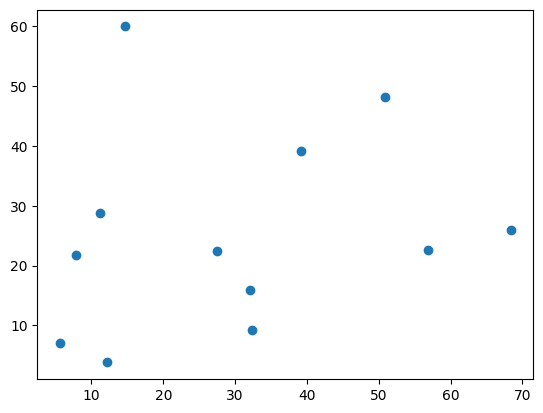

In [42]:
plt.scatter(final_df[final_df['Municipio'] == 'BOGOTA, D.C']['day_2_total_value_rainfall'], final_df[final_df['Municipio'] == 'BOGOTA, D.C']['month_2_total_value_rainfall'])
print(np.corrcoef(final_df.dropna()[final_df['Municipio'] == 'BOGOTA, D.C']['day_2_total_value_rainfall'], final_df.dropna()[final_df['Municipio'] == 'BOGOTA, D.C']['month_2_total_value_rainfall']))
